In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_field = pd.read_csv("data/RecastingFieldExperiment.txt", sep="\t")

In [3]:
# Correct Trophic_ID column name
df_field.rename(columns={"Trophic_ID ": "Trophic_ID"}, inplace=True)
df_field["Trophic_ID"].value_counts().shape

(24,)

In [4]:
pd.set_option('max_rows', 15)
df_field

,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0
1,2,A,1,A1,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,3.06,0.44,3.50,1916.67,173.57,18.86,5.0
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0
3,4,A,2,A2,Mesofauna,Acarina,Bdellidae,Predatory mite (attacking arthropods),62,62015,3,2.58,0.92,3.50,2416.67,167.86,17.60,5.0
4,5,A,2,A2,Mesofauna,Acarina,Eupodidae,Omnivore mite,82,82047,3,2.88,0.36,3.24,2416.67,167.86,17.60,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,584,B,2,B2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.89,8.89,2166.67,165.00,16.75,5.2
584,585,B,3,B3,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.12,9.12,2333.33,145.71,16.89,5.3
585,586,C,1,C1,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,9.05,9.05,3083.33,234.29,32.52,5.1
586,587,C,2,C2,Plant roots,Plantae,Roots,Primary (autotrophic) producer,#0,#0000,1,0.00,8.98,8.98,3333.33,193.57,32.10,4.9


In [5]:
# Create a pandas df from csv
df_matrix = pd.read_csv("data/matrice Marko-4_Martin.csv", header=0, index_col=0, sep=";")
#df.drop(df.columns[-1:], axis=1, inplace=True)
pd.set_option("max_columns", None)
df_matrix

,11 Plant-feeding nematode,31 Bacterivore nematode,45 Substrate-ingesting earthworm,23 Fungivore insect,24 Fungivore enchytraeid,21 Fungivore nematode,81 Omnivore nematode,13 Plant-feeding insect (springtail),44 Substrate-inhabiting enchytraeid,51 Predating nematode (consuming nematodes),72 Generalist mite,34 Bacterivore enchytraeid,82 Omnivore mite,12 Macrophytophage and panphytophage mite,36 Bacterivore amoebae,37 Bacterivore flagellates,#0 Plant autotrophs (roots),"41 ""Passive lifestage, substrate-related nematode""",48 Primary (heterotrophic) producer bacteria,49 Primary (heterotrophic) producer fungi,22 Microphytophage mite (feeding on fungi),62 Predatory mite (attacking arthropods),52 Predatory mite (attacking nematodes),92 Predatory mite (parasitizing mites and nematodes)
CONSUMERS,,,,,,,,,,,,,,,,,,,,,,,,
11 Plant-feeding nematode,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1
31 Bacterivore nematode,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,1
45 Substrate-ingesting earthworm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23 Fungivore insect,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
24 Fungivore enchytraeid,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49 Primary (heterotrophic) producer fungi,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
22 Microphytophage mite (feeding on fungi),0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
62 Predatory mite (attacking arthropods),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


In [6]:
# Import trophic level as node attribute
trophic_levels = pd.read_csv("data/trophic_levels_1_0.csv", index_col=0, header=None, delimiter=";", names=["trophic_level"])
trophic_levels = trophic_levels.squeeze()

# Create dict from trophic level Series
troph_lev_dict = trophic_levels.to_dict()
troph_lev_dict

{'11 Plant-feeding nematode': 1,
 '31 Bacterivore nematode': 1,
 '45 Substrate-ingesting earthworm': 1,
 '23 Fungivore insect': 1,
 '24 Fungivore enchytraeid': 1,
 '21 Fungivore nematode': 1,
 '81 Omnivore nematode': 2,
 '13 Plant-feeding insect (springtail)': 1,
 '44 Substrate-inhabiting enchytraeid': 1,
 '51 Predating nematode (consuming nematodes)': 3,
 '72 Generalist mite': 3,
 '34 Bacterivore enchytraeid': 1,
 '82 Omnivore mite': 2,
 '12 Macrophytophage and panphytophage mite': 1,
 '36 Bacterivore amoebae': 1,
 '37 Bacterivore flagellates': 1,
 '#0 Plant autotrophs (roots)': 0,
 '41 "Passive lifestage, substrate-related nematode"': 1,
 '48 Primary (heterotrophic) producer bacteria': 0,
 '49 Primary (heterotrophic) producer fungi': 0,
 '22 Microphytophage mite (feeding on fungi)': 1,
 '62 Predatory mite (attacking arthropods)': 3,
 '52 Predatory mite (attacking nematodes)': 3,
 '92 Predatory mite (parasitizing mites and nematodes)': 3}

In [7]:
# Create a graph from df by reading as adjacency matrix
#G = nx.from_pandas_adjacency(df_matrix)
G = nx.from_pandas_adjacency(df_matrix, create_using=nx.DiGraph)
# G = nx.DiGraph.reverse(G_rev)
G.name = "Graph from soil food web adjacency matrix"
print(nx.info(G))

DiGraph named 'Graph from soil food web adjacency matrix' with 24 nodes and 94 edges


In [8]:
# Remove edge weights (1 - form matrix)
for n1, n2, d in G.edges(data=True):
    d.clear()

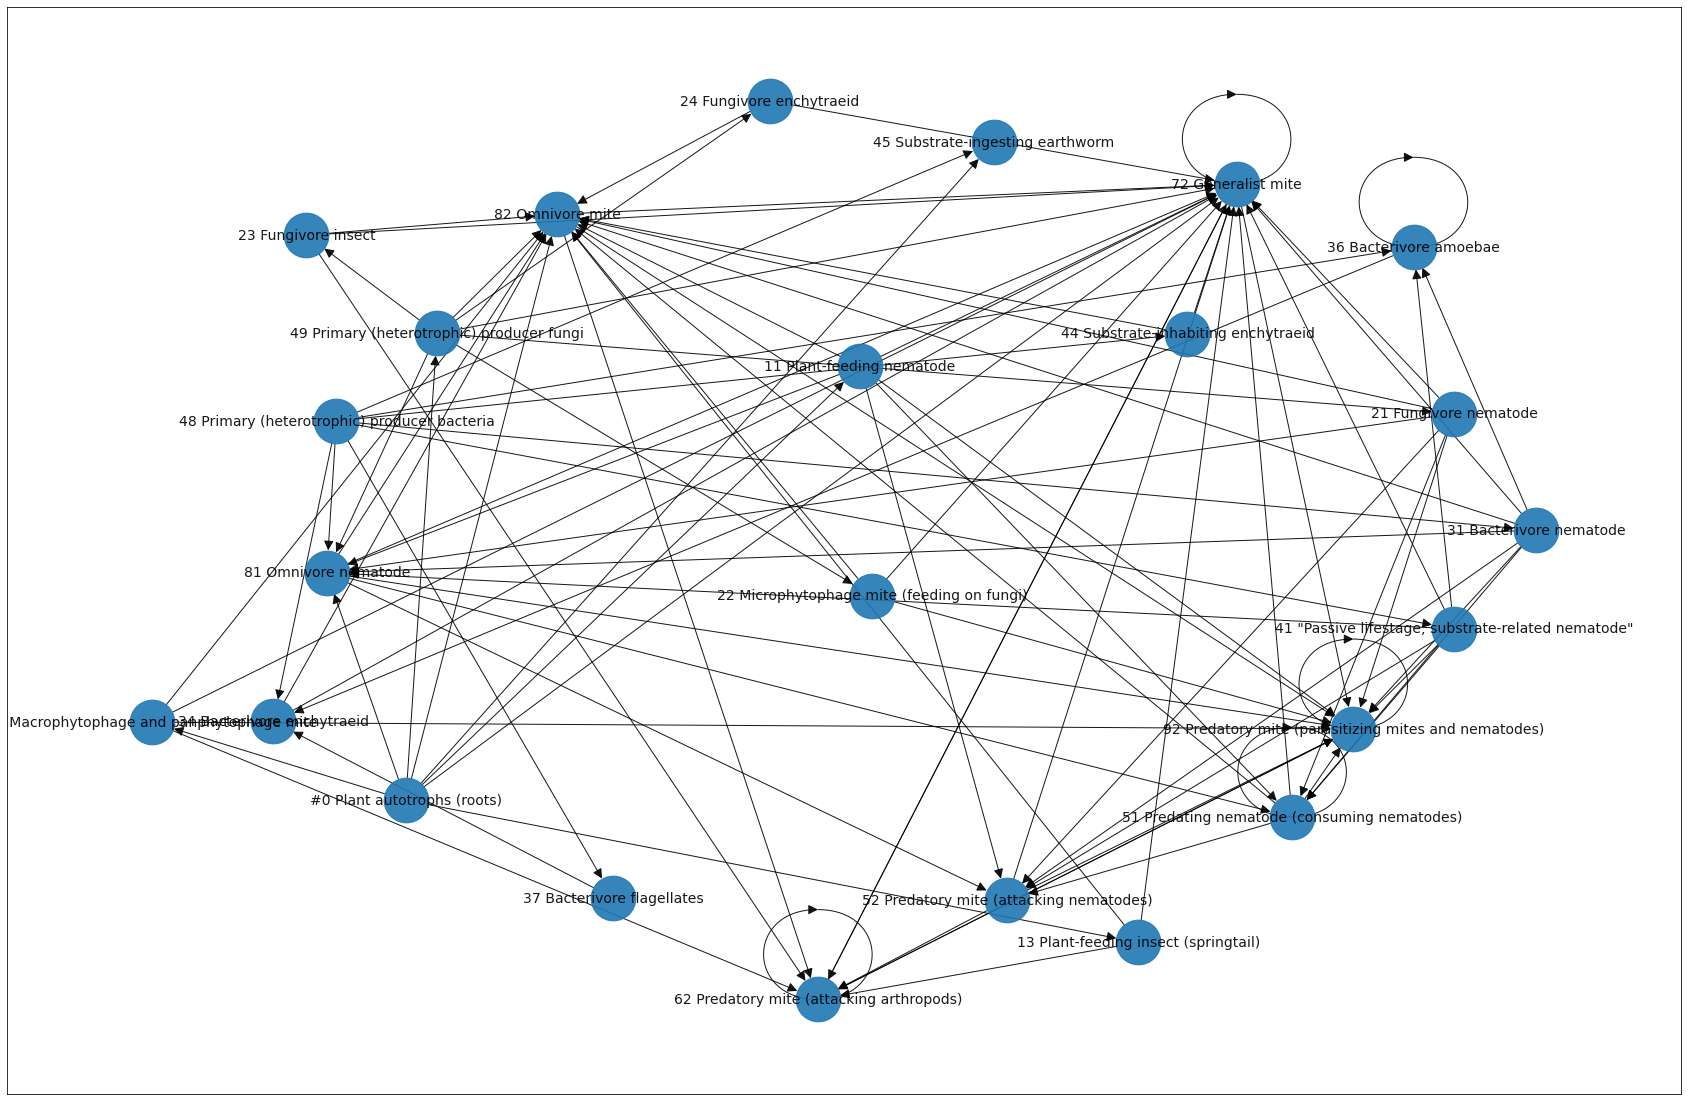

In [9]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=20, node_size=2000, alpha=0.9, font_size=14)
f.savefig("sf_network_6")

In [10]:
print(f"num of nodes: {G.number_of_nodes()}, num of edges: {G.number_of_edges()}, num of avg node degree {G.number_of_edges() / G.number_of_nodes():.2f}")

num of nodes: 24, num of edges: 94, num of avg node degree 3.92


In [11]:
# calculate degree centrality
dc = nx.degree_centrality(G)
# Sort by key value
sorted(dc.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.9565217391304348),
 ('82 Omnivore mite', 0.7391304347826086),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.6521739130434783),
 ('81 Omnivore nematode', 0.5217391304347826),
 ('51 Predating nematode (consuming nematodes)', 0.4782608695652174),
 ('62 Predatory mite (attacking arthropods)', 0.4782608695652174),
 ('52 Predatory mite (attacking nematodes)', 0.3913043478260869),
 ('31 Bacterivore nematode', 0.34782608695652173),
 ('#0 Plant autotrophs (roots)', 0.34782608695652173),
 ('48 Primary (heterotrophic) producer bacteria', 0.34782608695652173),
 ('49 Primary (heterotrophic) producer fungi', 0.34782608695652173),
 ('11 Plant-feeding nematode', 0.30434782608695654),
 ('21 Fungivore nematode', 0.30434782608695654),
 ('41 "Passive lifestage, substrate-related nematode"', 0.30434782608695654),
 ('36 Bacterivore amoebae', 0.2608695652173913),
 ('34 Bacterivore enchytraeid', 0.21739130434782608),
 ('12 Macrophytophage and panphytophage mite', 0.2173

In [12]:
# calculate in-degree centrality
ind = nx.in_degree_centrality(G)
# Sort by key value
sorted(ind.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.8260869565217391),
 ('82 Omnivore mite', 0.6086956521739131),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.5652173913043478),
 ('62 Predatory mite (attacking arthropods)', 0.34782608695652173),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('51 Predating nematode (consuming nematodes)', 0.2608695652173913),
 ('52 Predatory mite (attacking nematodes)', 0.2608695652173913),
 ('36 Bacterivore amoebae', 0.17391304347826086),
 ('34 Bacterivore enchytraeid', 0.13043478260869565),
 ('45 Substrate-ingesting earthworm', 0.08695652173913043),
 ('11 Plant-feeding nematode', 0.043478260869565216),
 ('31 Bacterivore nematode', 0.043478260869565216),
 ('23 Fungivore insect', 0.043478260869565216),
 ('24 Fungivore enchytraeid', 0.043478260869565216),
 ('21 Fungivore nematode', 0.043478260869565216),
 ('13 Plant-feeding insect (springtail)', 0.043478260869565216),
 ('44 Substrate-inhabiting enchytraeid', 0.043478260869565216),
 ('12 Macrophytophage and panph

In [13]:
# calculate out degree
od = nx.out_degree_centrality(G)
# Sort by key value
sorted(od.items(), key=lambda item: item[1], reverse=True)

[('#0 Plant autotrophs (roots)', 0.34782608695652173),
 ('48 Primary (heterotrophic) producer bacteria', 0.34782608695652173),
 ('31 Bacterivore nematode', 0.30434782608695654),
 ('49 Primary (heterotrophic) producer fungi', 0.30434782608695654),
 ('11 Plant-feeding nematode', 0.2608695652173913),
 ('21 Fungivore nematode', 0.2608695652173913),
 ('41 "Passive lifestage, substrate-related nematode"', 0.2608695652173913),
 ('81 Omnivore nematode', 0.21739130434782608),
 ('51 Predating nematode (consuming nematodes)', 0.21739130434782608),
 ('12 Macrophytophage and panphytophage mite', 0.17391304347826086),
 ('23 Fungivore insect', 0.13043478260869565),
 ('13 Plant-feeding insect (springtail)', 0.13043478260869565),
 ('72 Generalist mite', 0.13043478260869565),
 ('82 Omnivore mite', 0.13043478260869565),
 ('22 Microphytophage mite (feeding on fungi)', 0.13043478260869565),
 ('62 Predatory mite (attacking arthropods)', 0.13043478260869565),
 ('52 Predatory mite (attacking nematodes)', 0.13

In [14]:
# Check if graph is bipartite
nx.is_bipartite(G)

False

In [15]:
# Betweenes Centrality meassure
bc = nx.betweenness_centrality(G)
# Sort by key value
sorted(bc.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.01758893280632411),
 ('34 Bacterivore enchytraeid', 0.016963109354413704),
 ('82 Omnivore mite', 0.016798418972332016),
 ('81 Omnivore nematode', 0.009123847167325427),
 ('49 Primary (heterotrophic) producer fungi', 0.007905138339920948),
 ('92 Predatory mite (parasitizing mites and nematodes)',
  0.004183135704874835),
 ('36 Bacterivore amoebae', 0.003952569169960474),
 ('52 Predatory mite (attacking nematodes)', 0.003524374176548089),
 ('31 Bacterivore nematode', 0.00339262187088274),
 ('62 Predatory mite (attacking arthropods)', 0.003293807641633728),
 ('41 "Passive lifestage, substrate-related nematode"', 0.0027667984189723317),
 ('11 Plant-feeding nematode', 0.0023715415019762843),
 ('21 Fungivore nematode', 0.0023715415019762843),
 ('44 Substrate-inhabiting enchytraeid', 0.0011528326745718048),
 ('51 Predating nematode (consuming nematodes)', 0.0009881422924901185),
 ('12 Macrophytophage and panphytophage mite', 0.0008893280632411067),
 ('23 Fungivore in

In [16]:
# Closseness Centrality meassure
cc = nx.closeness_centrality(G)
# Sort by key value
sorted(cc.items(), key=lambda item: item[1], reverse=True)

[('72 Generalist mite', 0.8093645484949833),
 ('82 Omnivore mite', 0.6403162055335969),
 ('92 Predatory mite (parasitizing mites and nematodes)', 0.6189258312020461),
 ('62 Predatory mite (attacking arthropods)', 0.5260869565217392),
 ('81 Omnivore nematode', 0.30434782608695654),
 ('52 Predatory mite (attacking nematodes)', 0.29347826086956524),
 ('51 Predating nematode (consuming nematodes)', 0.25296442687747034),
 ('34 Bacterivore enchytraeid', 0.15527950310559005),
 ('36 Bacterivore amoebae', 0.13043478260869565),
 ('45 Substrate-ingesting earthworm', 0.08695652173913043),
 ('23 Fungivore insect', 0.05797101449275362),
 ('24 Fungivore enchytraeid', 0.05797101449275362),
 ('21 Fungivore nematode', 0.05797101449275362),
 ('22 Microphytophage mite (feeding on fungi)', 0.05797101449275362),
 ('11 Plant-feeding nematode', 0.043478260869565216),
 ('31 Bacterivore nematode', 0.043478260869565216),
 ('13 Plant-feeding insect (springtail)', 0.043478260869565216),
 ('44 Substrate-inhabiting 

In [17]:
# Get the PageRank
pr = nx.pagerank(G)
# Sort by key value
sorted(pr.items(), key=lambda item: item[1], reverse=True)

[('92 Predatory mite (parasitizing mites and nematodes)', 0.2952036677042548),
 ('62 Predatory mite (attacking arthropods)', 0.2885102736547667),
 ('72 Generalist mite', 0.19022630310125152),
 ('82 Omnivore mite', 0.03836425673031556),
 ('34 Bacterivore enchytraeid', 0.02011053706249362),
 ('36 Bacterivore amoebae', 0.015870564972276492),
 ('51 Predating nematode (consuming nematodes)', 0.015270711673527263),
 ('52 Predatory mite (attacking nematodes)', 0.015270711673527263),
 ('81 Omnivore nematode', 0.01276892611287683),
 ('45 Substrate-ingesting earthworm', 0.00791815188703724),
 ('23 Fungivore insect', 0.007407670150875816),
 ('24 Fungivore enchytraeid', 0.007407670150875816),
 ('21 Fungivore nematode', 0.007407670150875816),
 ('22 Microphytophage mite (feeding on fungi)', 0.007407670150875816),
 ('11 Plant-feeding nematode', 0.0072242932165202745),
 ('31 Bacterivore nematode', 0.0072242932165202745),
 ('13 Plant-feeding insect (springtail)', 0.0072242932165202745),
 ('44 Substrate

# Prepare dataset for each plot (A,B,C) with avg biomass and Mass of OTU agregated on trophic ID level

#### Plot A

In [18]:
# Create df for Plot A
df_field_a = df_field[df_field["Plot_ID"] == "A"].copy()
# Sort by OTU
df_field_a.sort_values("OTU", inplace=True)

# Remove log from biomass 
df_field_a["Biomass"] = 10**(df_field_a["Log10(Biomass)"])
df_field_a["Mass"] = 10**(df_field_a["Log10(Mass)"])

# List of OTUs
OTUs = df_field_a.OTU.unique()
print(f"Number of OTUs in plot A: {len(OTUs)}")

# # Create dictionary for number of times an organism appears (nr. of replicates)
# vc = df_field_a.OTU.value_counts()
# vc = vc.to_dict()

pd.set_option("max_rows", 15)
df_field_a.Biomass = df_field_a.Biomass
df_field_a.Mass = df_field_a.Mass
df_field_a

Number of OTUs in plot A: 96


,Record_ID,Plot_ID,Replicate,Web_ID,MajorGroup,PhylogeneticGroup,OTU,Guild,Trophic_ID,Taxon_ID,TrophicLevel,Log10(Abundance),Log10(Mass),Log10(Biomass),TotalSoil-C,TotalSoil-N,TotalSoil-P,Soil-pH,Biomass,Mass
132,133,A,1,A1,Mesofauna,Enchytraeidae,Achaeta,Fungivore enchytraeid,24,24001,2,3.15,0.44,3.59,1916.67,173.57,18.86,5.0,3890.451450,2.754229
133,134,A,1,A1,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,3.15,0.77,3.92,1916.67,173.57,18.86,5.0,8317.637711,5.888437
147,148,A,3,A3,Mesofauna,Enchytraeidae,Achaeta abulba,Fungivore enchytraeid,24,24001,2,2.85,0.77,3.62,3083.33,171.43,16.19,4.9,4168.693835,5.888437
0,1,A,1,A1,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.31,4.19,1916.67,173.57,18.86,5.0,15488.166189,20.417379
2,3,A,2,A2,Mesofauna,Acarina,Achipteria coleoptrata,Macrophytophage and panphytophage mite,12,12001,2,2.88,1.14,4.02,2416.67,167.86,17.60,5.0,10471.285481,13.803843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,297,A,1,A1,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,5.28,-0.66,4.62,1916.67,173.57,18.86,5.0,41686.938347,0.218776
329,330,A,2,A2,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,4.65,-0.66,3.99,2416.67,167.86,17.60,5.0,9772.372210,0.218776
368,369,A,3,A3,Microfauna,Nematoda,Tylenchorhynchus dubius,Plant-feeding nematode,11,11163,2,3.94,-0.66,3.28,3083.33,171.43,16.19,4.9,1905.460718,0.218776
18,19,A,3,A3,Mesofauna,Acarina,Tyrophagus,Microphytophage mite (feeding on fungi),22,22140,2,2.88,0.73,3.61,3083.33,171.43,16.19,4.9,4073.802778,5.370318


In [ ]:
df_field_a[df_field_a.Trophic_ID == "48"]

In [ ]:
# Calculate the aggregated biomas per Trophic_ID

# Create dictionary OTU-> Trophic_ID
OTU2trophicID = pd.Series(df_field_a.Trophic_ID.values, df_field_a.OTU.values).to_dict()

# Calcualte avg biomas by OTU group
df_group_A_bm = df_field_a.groupby(["OTU"], as_index=False).Biomass.mean()
df_group_A_bm.Biomass = df_group_A_bm.Biomass.round(2)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_bm["OTU"].iteritems():
    df_group_A_bm.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_bm = df_group_A_bm.groupby("Trophic_ID", as_index=False).Biomass.sum()
df_group_A_bm

# pd.set_option("max_rows", None)

# Create dictionary for avg biomass feature
avg_biomass_A = pd.Series(df_group_A_bm.Biomass.values, df_group_A_bm.Trophic_ID.values).to_dict()

avg_biomass_A

In [ ]:
# Calculate the aggregated mass per Trophic_ID

# Calcualte avg mass by OTU group
df_group_A_m = df_field_a.groupby(["OTU"], as_index=False).Mass.mean()
# df_group_A_m.Mass = df_group_A_m.Mass.round(4)

# Add Trophic_ID to df_group_a
for idx, otu in df_group_A_m["OTU"].iteritems():
    df_group_A_m.loc[idx, "Trophic_ID"] = OTU2trophicID[otu]

df_group_A_m = df_group_A_m.groupby("Trophic_ID", as_index=False).Mass.sum()
df_group_A_m

# pd.set_option("max_rows", None)

# Create dictionary for avg mass feature
avg_mass_A = pd.Series(df_group_A_m.Mass.values, df_group_A_m.Trophic_ID.values).to_dict()

#Change key "#0" to 00
#avg_mass_A["00"] = avg_mass_A.pop("#0")

avg_mass_A

In [ ]:
# Unify node names and Trophic_ID names in Biomass dict
for key_attr in list(avg_biomass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_biomass_A[key_node] = avg_biomass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_biomass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_biomass_A.items(), key=lambda item: item[1]))

In [ ]:
# Unify node names and Trophic_ID names in Mass dict
for key_attr in list(avg_mass_A):
    for key_node in list(G.nodes):
        if key_attr in key_node:
            avg_mass_A[key_node] = avg_mass_A.pop(key_attr)
            
# If no "92 Predatory mite (parasitizing mites and nematodes)" add them manually
avg_mass_A["92 Predatory mite (parasitizing mites and nematodes)"] = 0
dict(sorted(avg_mass_A.items(), key=lambda item: item[1]))

In [24]:
# Add trophic level as attribute
nx.set_node_attributes(G, troph_lev_dict, "trophic_level")
# Add biomas as attribute
nx.set_node_attributes(G, avg_biomass_A, "Biomass")
# Add mass as attribute
nx.set_node_attributes(G, avg_mass_A, "Mass")
G.nodes(data=True)

NodeDataView({'11 Plant-feeding nematode': {'trophic_level': 1, 'Biomass': 479278.83999999997, 'Mass': 6.031837019417812}, '31 Bacterivore nematode': {'trophic_level': 1, 'Biomass': 97189.95, 'Mass': 0.44778320101132774}, '45 Substrate-ingesting earthworm': {'trophic_level': 1, 'Biomass': 20876194.67, 'Mass': 656677.5800017535}, '23 Fungivore insect': {'trophic_level': 1, 'Biomass': 87314.16, 'Mass': 123.42029317311494}, '24 Fungivore enchytraeid': {'trophic_level': 1, 'Biomass': 666025.6699999999, 'Mass': 469.51500281899325}, '21 Fungivore nematode': {'trophic_level': 1, 'Biomass': 17869.440000000002, 'Mass': 0.060594173232088044}, '81 Omnivore nematode': {'trophic_level': 2, 'Biomass': 301148.6, 'Mass': 1.6196323444430343}, '13 Plant-feeding insect (springtail)': {'trophic_level': 1, 'Biomass': 12483.4, 'Mass': 8.82985650742963}, '44 Substrate-inhabiting enchytraeid': {'trophic_level': 1, 'Biomass': 213718.46000000002, 'Mass': 109.48778868944353}, '51 Predating nematode (consuming ne

### Prepare network divided by trophic level 1 as source

In [ ]:
G.nodes

In [25]:
# Create a pickle of the graph
nx.write_gpickle(G, "objects/graph-A_3_0", protocol=5)

'92 Predatory mite (parasitizing mites and nematodes)' was not detected in Plot A and C and has no biomass feature.

# Prepare dataset for each plot (A,B,C) with Mass and Biomass ratios as edge weights

In [27]:
# Calculate Mass ratios of neigbouring nodes
# get list od edges
edge_list = list(G.edges())

# Create a dict of edge tuples (keys) to Mass ratios (edge attribute values)
mass_ratios_dict = {}
for edge_tuple in edge_list:
    consumer = G.nodes[edge_tuple[1]]["Mass"]
    resource = G.nodes[edge_tuple[0]]["Mass"]
    if resource == 0:
        resource += 0.00000001
    # calculate the Mass ratio consumer/resource  
    mass_ratio = consumer/resource
    mass_ratios_dict[edge_tuple] = mass_ratio

# Add Mass ratios as attribute to edges
nx.set_edge_attributes(G, mass_ratios_dict, name="mass_ratio")

In [28]:
df_mass_ratios = pd.DataFrame.from_dict(mass_ratios_dict, orient="index", columns=["mass_ratio"])
df_mass_ratios.index.name = "edges (resource, consumer)"

In [29]:
pd.set_option("max_rows", 15)
df_mass_ratios = df_mass_ratios.sort_values("mass_ratio", ascending=False)
df_mass_ratios

,mass_ratio
"edges (resource, consumer)",
"(48 Primary (heterotrophic) producer bacteria, 45 Substrate-ingesting earthworm)",6.535037e+12
"(48 Primary (heterotrophic) producer bacteria, 44 Substrate-inhabiting enchytraeid)",1.089586e+09
"(92 Predatory mite (parasitizing mites and nematodes), 62 Predatory mite (attacking arthropods))",8.317638e+08
"(48 Primary (heterotrophic) producer bacteria, 34 Bacterivore enchytraeid)",3.298733e+08
"(48 Primary (heterotrophic) producer bacteria, 81 Omnivore nematode)",1.611804e+07
...,...
"(12 Macrophytophage and panphytophage mite, 92 Predatory mite (parasitizing mites and nematodes))",0.000000e+00
"(21 Fungivore nematode, 92 Predatory mite (parasitizing mites and nematodes))",0.000000e+00
"(41 ""Passive lifestage, substrate-related nematode"", 92 Predatory mite (parasitizing mites and nematodes))",0.000000e+00


In [30]:
df_mass_ratios.to_csv("SFW_mass_ratios_1.csv", sep=";")

In [31]:
list(G.edges(data=True))[:5]

[('11 Plant-feeding nematode',
  '81 Omnivore nematode',
  {'mass_ratio': 0.2685139434684792}),
 ('11 Plant-feeding nematode',
  '51 Predating nematode (consuming nematodes)',
  {'mass_ratio': 0.0882928181826962}),
 ('11 Plant-feeding nematode',
  '72 Generalist mite',
  {'mass_ratio': 9.654103099253735}),
 ('11 Plant-feeding nematode',
  '82 Omnivore mite',
  {'mass_ratio': 3.233375054282795}),
 ('11 Plant-feeding nematode',
  '52 Predatory mite (attacking nematodes)',
  {'mass_ratio': 0.268874986531958})]

### Plot distribution of mass ratios

In [32]:
# Create a series of Mass ratios (edge weighs)
MR_series = pd.Series(mass_ratios_dict.values())
MR_series.describe()

count    9.400000e+01
mean     6.954591e+10
std      6.740350e+11
min      0.000000e+00
25%      5.521012e-06
50%      9.511662e-01
75%      2.339008e+01
max      6.535037e+12
dtype: float64

In [33]:
MR_series.sort_values()

46    0.000000e+00
41    0.000000e+00
92    0.000000e+00
50    0.000000e+00
28    0.000000e+00
          ...     
70    1.611804e+07
72    3.298733e+08
93    8.317638e+08
71    1.089586e+09
69    6.535037e+12
Length: 94, dtype: float64

<AxesSubplot:>

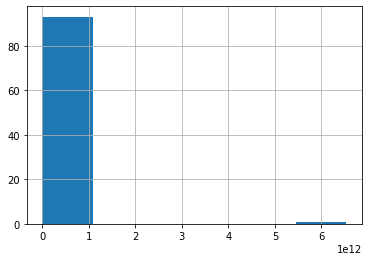

In [34]:
MR_series.hist(bins=6)

# Visaulise Graph A with Biomass

In [35]:
# Prepare biomass feature values
biomass_array = np.array(list(avg_biomass_A.values()))
biomass_array

array([8.39114315e+08, 4.79278840e+05, 1.58897300e+04, 1.24834000e+04,
       1.78694400e+04, 1.54056300e+04, 8.73141600e+04, 6.66025670e+05,
       9.71899500e+04, 1.16602300e+05, 4.30441330e+05, 1.47631770e+05,
       1.16829600e+04, 2.13718460e+05, 2.08761947e+07, 9.43999808e+06,
       1.34991666e+07, 4.30242400e+04, 1.23027000e+03, 3.16228000e+03,
       3.16438600e+04, 3.01148600e+05, 1.87707500e+04, 0.00000000e+00])

In [36]:
array_log = 100*np.log2(biomass_array)
# np.interp(array, (array.min(), array.max()), (0, 5))
list_log = list(array_log)
list_log.sort()
print(list_log)

[-inf, 1026.4759254628439, 1162.6749399583894, 1351.2118221944004, 1360.772330213816, 1391.1170060906993, 1395.5806990014958, 1412.520680285543, 1419.6198674878806, 1494.963797377215, 1539.2862087610044, 1641.392801857265, 1656.8519518125572, 1683.1236720658478, 1717.164369373056, 1770.5352001059903, 1820.0116026474927, 1871.5457083287074, 1887.0505721297625, 1934.521825724087, 2317.035513548176, 2368.6367006364612, 2431.5355424440977, 2964.429212512077]


/var/folders/4p/mr19cxrs6_z3dsfws0cjcwfw0000gn/T/ipykernel_32968/11232855.py:1: RuntimeWarning: divide by zero encountered in log2
  array_log = 100*np.log2(biomass_array)


In [37]:
# np. linspace
# Rescale Biomass feature by standardisation

OldMax = np.amax(biomass_array)
OldMin = np.amin(biomass_array)
NewMax = 100000
NewMin = 1000

OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

bm_array_stand = []
for OldValue in biomass_array:
    bm_array_stand.append((((OldValue - OldMin) * NewRange) / OldRange) + NewMin)
bm_array_stand = np.array(bm_array_stand)

list_stand = list(bm_array_stand)
list_stand.sort()
print(list_stand)

[1000.0, 1000.1451491505669, 1000.3730906677841, 1001.378373625389, 1001.4728107701458, 1001.8175799689893, 1001.8746948330349, 1002.1082640697625, 1002.2146020125698, 1003.7333913690969, 1005.0760661397806, 1010.3014591564983, 1011.4666200802608, 1013.7569190495992, 1017.4178237396609, 1025.2148332719426, 1035.5299759275772, 1050.7841314657758, 1056.5460561589766, 1078.5787349575874, 2113.7455214428214, 2592.652479009881, 3463.0056194334525, 100000.0]


In [38]:
troph_lev_dict

{'11 Plant-feeding nematode': 1,
 '31 Bacterivore nematode': 1,
 '45 Substrate-ingesting earthworm': 1,
 '23 Fungivore insect': 1,
 '24 Fungivore enchytraeid': 1,
 '21 Fungivore nematode': 1,
 '81 Omnivore nematode': 2,
 '13 Plant-feeding insect (springtail)': 1,
 '44 Substrate-inhabiting enchytraeid': 1,
 '51 Predating nematode (consuming nematodes)': 3,
 '72 Generalist mite': 3,
 '34 Bacterivore enchytraeid': 1,
 '82 Omnivore mite': 2,
 '12 Macrophytophage and panphytophage mite': 1,
 '36 Bacterivore amoebae': 1,
 '37 Bacterivore flagellates': 1,
 '#0 Plant autotrophs (roots)': 0,
 '41 "Passive lifestage, substrate-related nematode"': 1,
 '48 Primary (heterotrophic) producer bacteria': 0,
 '49 Primary (heterotrophic) producer fungi': 0,
 '22 Microphytophage mite (feeding on fungi)': 1,
 '62 Predatory mite (attacking arthropods)': 3,
 '52 Predatory mite (attacking nematodes)': 3,
 '92 Predatory mite (parasitizing mites and nematodes)': 3}

In [39]:
list(G.nodes())

['11 Plant-feeding nematode',
 '31 Bacterivore nematode',
 '45 Substrate-ingesting earthworm',
 '23 Fungivore insect',
 '24 Fungivore enchytraeid',
 '21 Fungivore nematode',
 '81 Omnivore nematode',
 '13 Plant-feeding insect (springtail)',
 '44 Substrate-inhabiting enchytraeid',
 '51 Predating nematode (consuming nematodes)',
 '72 Generalist mite',
 '34 Bacterivore enchytraeid',
 '82 Omnivore mite',
 '12 Macrophytophage and panphytophage mite',
 '36 Bacterivore amoebae',
 '37 Bacterivore flagellates',
 '#0 Plant autotrophs (roots)',
 '41 "Passive lifestage, substrate-related nematode"',
 '48 Primary (heterotrophic) producer bacteria',
 '49 Primary (heterotrophic) producer fungi',
 '22 Microphytophage mite (feeding on fungi)',
 '62 Predatory mite (attacking arthropods)',
 '52 Predatory mite (attacking nematodes)',
 '92 Predatory mite (parasitizing mites and nematodes)']

In [40]:
print(list(avg_mass_A) == list(avg_biomass_A))
print(list(avg_biomass_A) == list(G.nodes()))
print(list(G.nodes()) == list(troph_lev_dict))

True
False
True


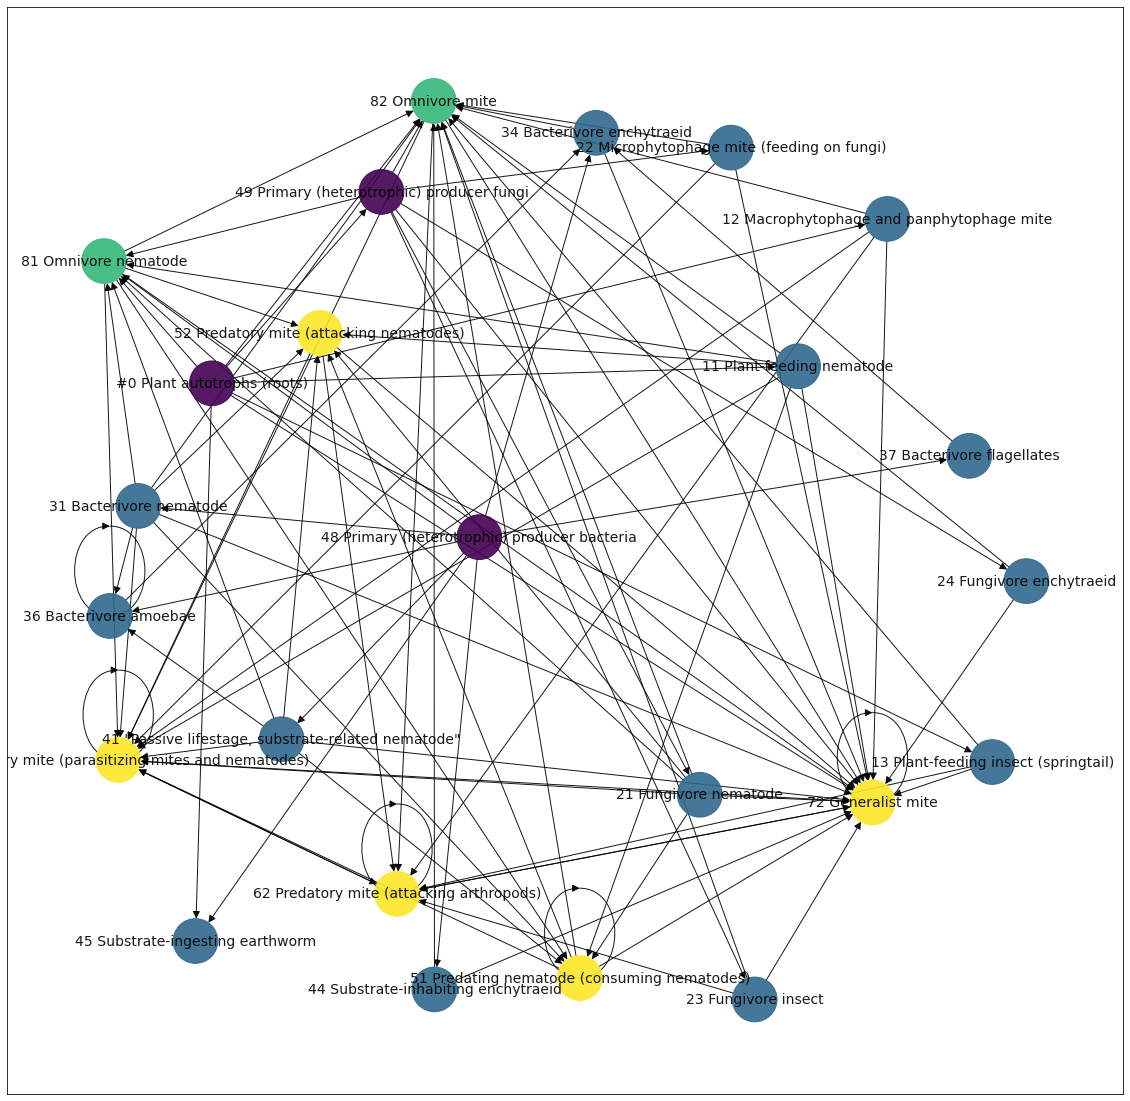

In [41]:
# Visualise graph (if using attributes the list of values needs to be in the same order as the nodes are stored in the Graph!)
f = plt.figure(3,figsize=(20,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, node_size=2000, node_color=list(troph_lev_dict.values()), alpha=0.9, font_size=14)
# f.savefig("sf_network_6_log")

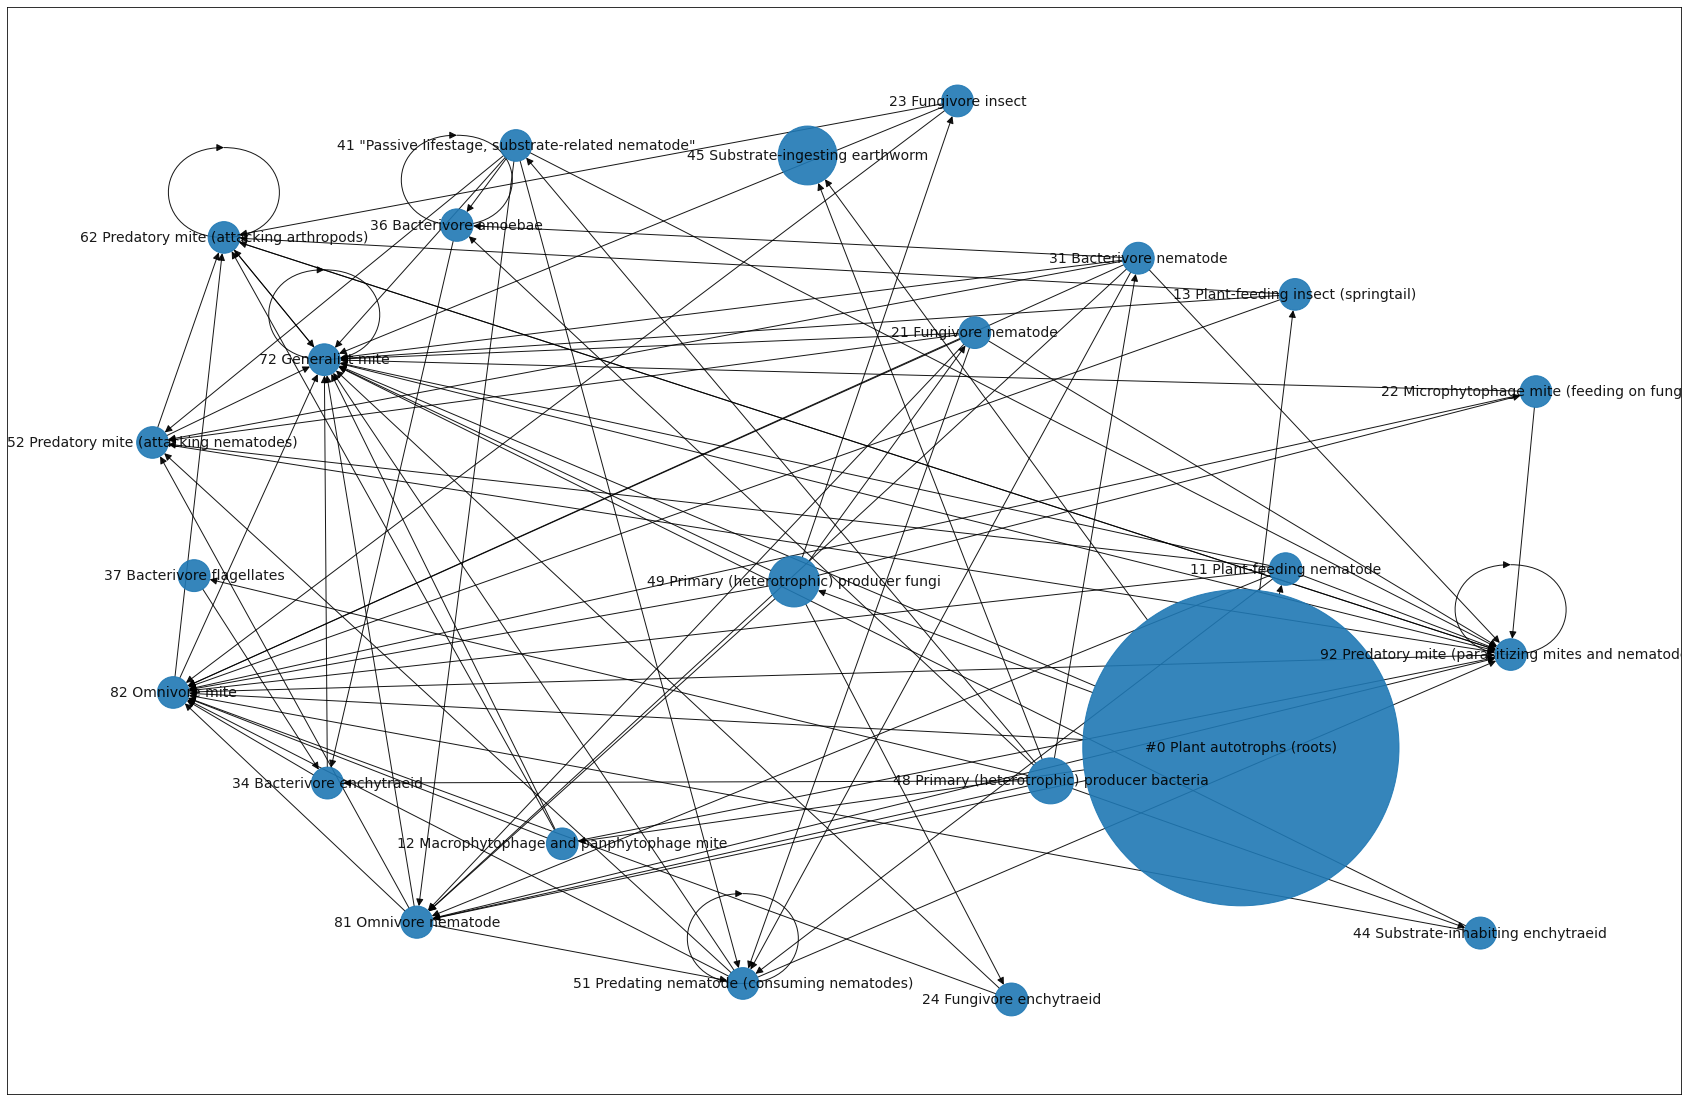

In [42]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, arrowsize=15, nodelist=list(avg_biomass_A.keys()), node_size=bm_array_stand, alpha=0.9, font_size=14)
# f.savefig("sf_network_4")

## Visualise graph with edge weights

In [43]:
# Prepare mass feature values
mass_array = np.array(MR_series)
mass_array

array([2.68513943e-01, 8.82928182e-02, 9.65410310e+00, 3.23337505e+00,
       2.68874987e-01, 0.00000000e+00, 3.61700113e+00, 1.18934316e+00,
       1.30045023e+02, 4.35549867e+01, 9.67613067e-05, 3.62186454e+00,
       0.00000000e+00, 4.71818491e-01, 1.58022565e-01, 6.73927885e-02,
       1.24025806e-01, 4.15390163e-02, 2.67291764e+01, 8.78909408e+00,
       9.61016107e+02, 3.21865789e+02, 2.67651164e+01, 0.00000000e+00,
       3.28820236e-01, 3.59538241e+01, 1.20417399e+01, 1.00134460e+00,
       0.00000000e+00, 6.59489499e+00, 2.20877784e+00, 9.41990134e-01,
       5.31858184e-01, 1.78131202e-01, 1.00000000e+00, 1.09341884e+02,
       3.66210426e+01, 3.04526452e+00, 0.00000000e+00, 1.00000000e+00,
       1.42836260e-01, 0.00000000e+00, 1.75675102e+00, 5.88375209e-01,
       2.98576656e+00, 4.26475727e-01, 0.00000000e+00, 2.71832883e+00,
       9.10429124e-01, 3.88275923e-01, 0.00000000e+00, 1.00000000e+00,
       7.65035864e+05, 5.93856884e+06, 7.18833765e-09, 7.82584171e-04,
      

In [44]:
# mass_array_log = 100*np.log2(mass_array)
# # np.interp(array, (array.min(), array.max()), (0, 5))
# mass_list_log = list(mass_array_log)
# mass_list_log.sort()
# print(mass_list_log)
# len(mass_list_log)

In [45]:
# np. linspace
# Rescale Mass ratio dege feature by standardisation

OldMax = np.amax(mass_array)
OldMin = np.amin(mass_array)
NewMax = 10
NewMin = 1

OldRange = (OldMax - OldMin)  
NewRange = (NewMax - NewMin)  

mass_array_stand = []
for OldValue in mass_array:
    mass_array_stand.append(((((OldValue - OldMin) * NewRange) / OldRange) + NewMin))
mass_array_stand = np.array(mass_array_stand)

mass_list_stand = list(mass_array_stand)
mass_list_stand.sort()
print(mass_list_stand)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.000000000000001, 1.0000000000000016, 1.0000000000000222, 1.0000000000000573, 1.0000000000000928, 1.0000000000001217, 1.0000000000001708, 1.0000000000001967, 1.0000000000002176, 1.0000000000002454, 1.0000000000003697, 1.0000000000003704, 1.0000000000004527, 1.0000000000005347, 1.0000000000005873, 1.0000000000006497, 1.0000000000007325, 1.0000000000008102, 1.0000000000012539, 1.0000000000012974, 1.0000000000013225, 1.0000000000013771, 1.0000000000013771, 1.0000000000013771, 1.0000000000013771, 1.0000000000013791, 1.000000000001638, 1.0000000000024194, 1.000000000003042, 1.0000000000037437, 1.0000000000039488, 1.000000000004112, 1.000000000004194, 1.0000000000044529, 1.0000000000049813, 1.000000000004988, 1.000000000007063, 1.0000000000090825, 1.0000000000096418, 1.0000000000121043, 1.0000000000132956, 1.0000000000165838, 1.00000000001841

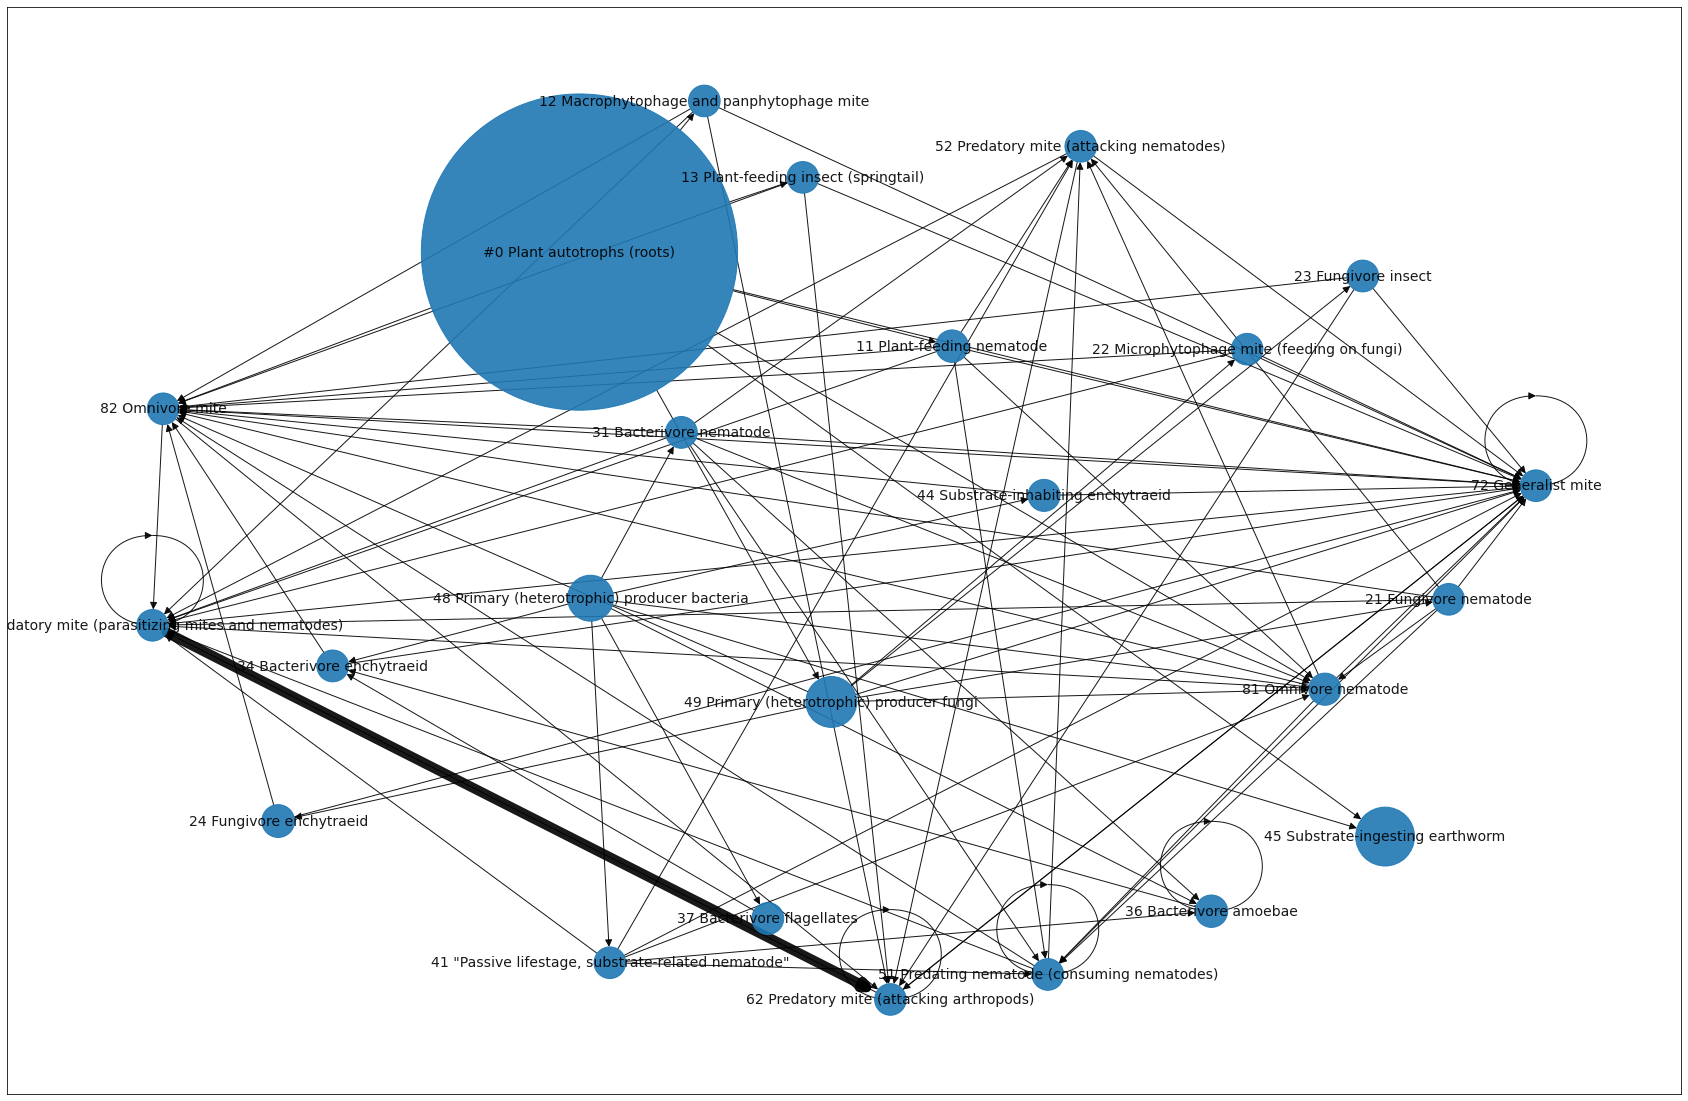

In [46]:
# Visualise graph
f = plt.figure(3,figsize=(30,20)) 
pos = nx.spring_layout(G, k=1.2, iterations=20)
nx.draw_networkx(G, pos, width=mass_list_stand,  arrowsize=15, nodelist=list(avg_biomass_A.keys()), node_size=bm_array_stand, alpha=0.9, font_size=14)
# f.savefig("sf_network_4")

In [47]:
# Marko: Zmanjšaj največjega
## Vid:  raje umatknil an rob; treba odstranit manjkajočega; nx.pagerank bojda lahko upošteva edge weight


In [48]:
# Nariši z graphviz ali gephi

In [49]:
# ali je biomasa nad 10% biomase s katerimi se prehranjujeo (verjetno edge attribute)

In [50]:
# page rank: uproabit random walk ki upoštevan atribute na povezavah (uteži)

In [51]:
# ?Flow network: Matrix: max and min flow; simulate flow using link weights; Check if usable for simulation
# try personalised pagerank (random walk pogojen s utežmi na povezavi)